# Certifciate Quality Classifier v5
## I will be learning using using K Means Clustering with this version
k-Means is an unsupervised algorithm that groups data into k clusters based on similarity.

k is number of clusters, for our experiment we will use 3 clusters called Approve, Needs Review and Reject. (grouping based on similarity)
let me walk through how to use it for our problem statement.
I will not do complex math in this session, I will try to do it another sample project, this time i will use python ML packages to directly calculate the K Means clusters

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

lets get our Wine dataset and create a data frame

In [25]:
wine_df = pd.read_csv('../ref_datasets/winequality-red.csv',sep=';')
X = wine_df[
    [
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol",
        "quality",
    ]
]
# setting y-true value for later calculation of accuracy
conditions = [
    (wine_df['quality'] < 4),  # Rejected (0, low quality)
    (wine_df['quality'] > 5),  # Approved (1, high quality)
    True                    # Needs Review (2, medium quality)
]
wine_df['actual_decision'] = np.select(conditions, [2, 1, 0])

Set K and initialise the model

In [26]:
# set num of clustrers as we need 3 classifications
k = 3

# Initialize the KMeans model with n_init='auto' this ensures best results across multiple runs
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

Train the model and check the clustering sample

In [27]:
# Train the model 
kmeans.fit(X)

# Predict clsuters
cluster_labels = kmeans.predict(X)

# Tlets check our sample outcome
print("First 10 cluster assignments:", cluster_labels[:10])

First 10 cluster assignments: [0 1 1 1 0 0 1 0 0 2]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


finding the centroids - Each centroid is the average value of each feature in that cluster.

In [28]:
# find coordinates of the final centroids
centroids = kmeans.cluster_centers_

print("Final Centroids (Cluster Centers):")
print(centroids)

Final Centroids (Cluster Centers):
[[8.48842105e+00 5.19304094e-01 2.71029240e-01 2.36859649e+00
  8.46046784e-02 9.27485380e+00 2.32573099e+01 9.96637310e-01
  3.31007018e+00 6.47918129e-01 1.05828850e+01 5.74385965e+00]
 [8.24682540e+00 5.20575397e-01 2.69087302e-01 2.49761905e+00
  9.18869048e-02 2.22331349e+01 5.62440476e+01 9.96849147e-01
  3.32313492e+00 6.78630952e-01 1.03502646e+01 5.61309524e+00]
 [7.87125000e+00 5.73375000e-01 2.74750000e-01 3.23166667e+00
  8.83791667e-02 2.60354167e+01 1.08625000e+02 9.96921125e-01
  3.28958333e+00 6.51583333e-01 1.00060417e+01 5.30000000e+00]]


map clusters to easy labels

In [29]:
#initially i had labbeled 0 as rejected and 2 as approved but since later I found 0 is actually apprpval
label_map = {
    0: 'Approved',
    1: 'Needs Review',
    2: 'Reject'
}

#added both predicted and and labels into dataframe
wine_df['cluster_labels'] =pd.DataFrame(cluster_labels)
wine_df['Status_Label'] = wine_df['cluster_labels'].map(label_map)

In [30]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,actual_decision,cluster_labels,Status_Label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,Approved
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1,Needs Review
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,1,Needs Review
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1,Needs Review
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,Approved


**Principal Component Analysis** - is used to compress data into 2d and keeping max variance
each dot represents 1 sample and color is based on clusters

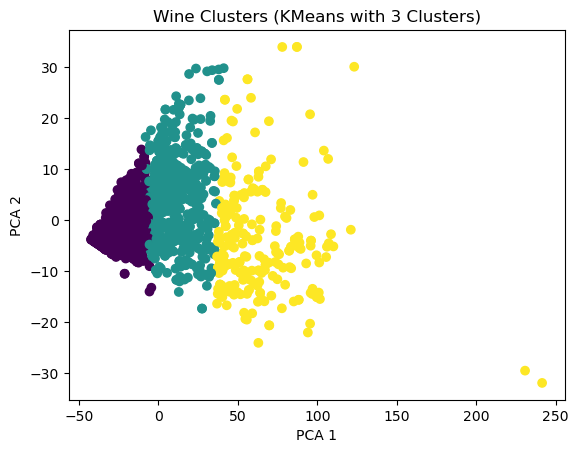

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Wine Clusters (KMeans with 3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


Determining optimal number of clusters (using Elbow Method) - helps in knowing best k value
SSE (Sum of Squared Errors) = how tightly points cluster around centroids.
As k increases, SSE decreases — but after a point, improvement flattens (the “elbow”).
That elbow point ≈ optimal cluster count.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

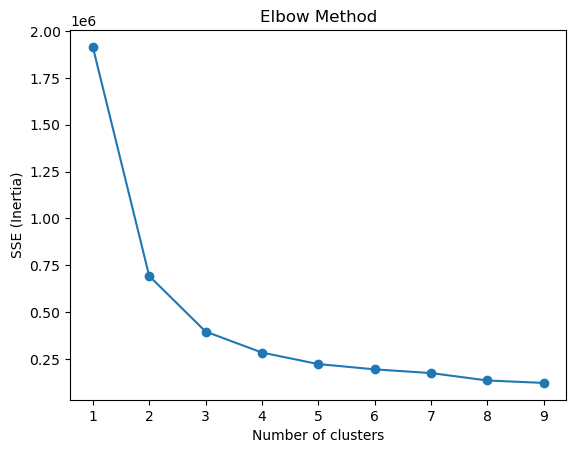

In [32]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X)
    sse.append(km.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.show()


Checking average wine quality per cluster

In [33]:
wine_df['cluster_labels'] = cluster_labels
wine_df.groupby('cluster_labels')['quality'].mean()


cluster_labels
0    5.744731
1    5.611881
2    5.300000
Name: quality, dtype: float64

In [ ]:
trying to check synthetic decisions and K Means clusters, low accuracy found based on simple decision

In [24]:
from sklearn.metrics import accuracy_score
y_true = wine_df["actual_decision"]
y_pred=wine_df['cluster_labels']
accuracy_score(y_true, y_pred)

0.3808630393996248